In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_context('talk')
np.set_printoptions(suppress=True) 
    ### not xEyy format(science float format)
%matplotlib inline  

In [2]:
import scipy.io
data = scipy.io.loadmat('ex7data2.mat')
print data.keys()

['X', '__version__', '__header__', '__globals__']


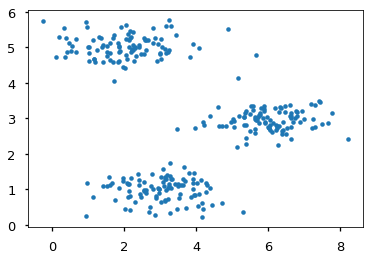

In [27]:
def plotData(X):
    X = data['X']
    plt.plot(X[:,0], X[:,1], '.');

plotData(X)

In [4]:
def findClosestCentroids(X, centroids):
    K = len(centroids)
    idx = np.zeros([len(X), 1])
    for i in xrange(len(X)):
        dmin, dmin_j = -1, -1
        for j in xrange(len(centroids)):
            dst = np.sum((X[i,:] - centroids[j, :])**2)
#             print dst,
            if dmin > dst or dmin==-1:
                dmin = dst
                dmin_j = j
        idx[i, 0] = dmin_j
#         print '->', dmin_j
    return idx

In [5]:
K = 3
initial_centroids = np.array([[3,3],
                              [6,2],
                              [8,5]])
idx = findClosestCentroids(X, initial_centroids)
print idx[:3]   ### 0,2,1

[[0.]
 [2.]
 [1.]]


In [22]:
def computeCentroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros([K, n])
    for i in xrange(K):
        centroids[i] = X[np.where(idx==i)[0]].mean(axis=0)
    return centroids

In [24]:
centroids = computeCentroids(X, idx, K)
print centroids
### 2.428301, 3.157924
### 5.813503, 2.633656
### 7.119387, 3.616684

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [97]:
# import matplotlib.lines as lines
def plotProgresskMeans(centroids, previous, ax):
    plt.plot(centroids[:, 0], centroids[:, 1], 'rX');
    for i in xrange(len(centroids)):
        x1 = [centroids[i,0], previous[i,0]]
        x2 = [centroids[i,1], previous[i,1]]
        plt.plot(x1, x2, 'g');
#         line = lines.Line2D(x1, x2)
#         ax.add_line(line);

def runkMeans(X, initial_centroids, max_iters):
    m, n = X.shape
    K = len(initial_centroids)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros([m, 1])
    fig, ax = plt.subplots()
    plotData(X)
    plt.plot(centroids[:, 0], centroids[:, 1], 'rX');
    for i in xrange(max_iters):
        idx = findClosestCentroids(X, centroids)
        previous_centroids = centroids
        centroids = computeCentroids(X, idx, K)
        plotProgresskMeans(centroids, previous_centroids, ax)
    return centroids, idx

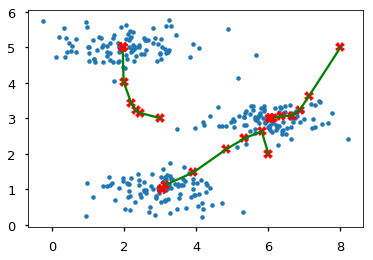

In [98]:
max_iters = 10
centroids, idx = runkMeans(X, initial_centroids, max_iters)